### Figure 4
Reproducing Figure 4, showing the out-of-time-ordered correlator, with two different initial values on the left panel, and a frequency plot of the out-of-time-ordered correlator on the right panel.

In [9]:
from typing import Counter
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Loading the data 

The left panel of Figure 4, requires the files `/data/otoc_data/fig4/fig4_left1.npz` and `/data/otoc_data/fig4/fig4_left2.npz`. These contain data from simulations of the out-of-time ordered correlator, on a system of $120$ qubits, averaged over $1000$ realisations of the circuit. The operator $V(0) = C3$ and the initial operators $W(0)$ were of the form:

 $$
D_1 XX...X
 $$

 Where $D_1 = X$ for the data in `/data/otoc_data/fig4/fig4_left1.npz` and $D_1 = Y$ for the data in `/data/otoc_data/fig4/fig4_left2.npz`.

The data for reproducing the right panel of figure 4, can be found in `/data/otoc_data/fig4/fig4_right.csv`, it contains the data for OTOC calculations for $2000$ realisations of a circuit with $120$ qubits, these have not been averaged and instead all of the individual results for the calculations are included. The data found here computed the OTOC where $V(0) = C3$ and $W(0) = XX...X$.


In [10]:
dir_otoc1 = os.getcwd() + "/data/otoc_data/fig4/fig4_left1.npz"
dir_otoc2 = os.getcwd() + "/data/otoc_data/fig4/fig4_left2.npz"

data = np.load(dir_otoc1)
for arr in data:
    Ft1 = data[arr]

data = np.load(dir_otoc2)
for arr in data:
    Ft2 = data[arr]

counts = pd.read_csv(os.getcwd() + "/data/otoc_data/fig4/fig4_right.csv")

#### Reproducing the plots

Plotting the left panel:

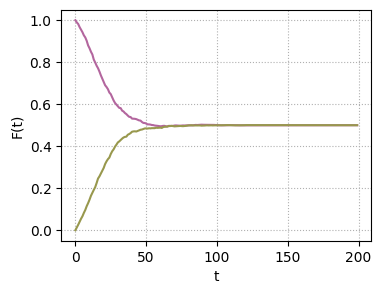

In [11]:
plt.figure(
    figsize=(4, 3)
)  # left: 0.133, bottom: 0.155 - need to fix these to make sure labels show.
plt.plot(range(0, 200), Ft1, color="#b3669e", label="XXXX")
plt.plot(range(0, 200), Ft2, color="#98984d", label="YXXX")
plt.xlabel("t")
plt.ylabel("F(t)")
plt.grid(linestyle="dotted")
plt.show()

Plotting the right panel:

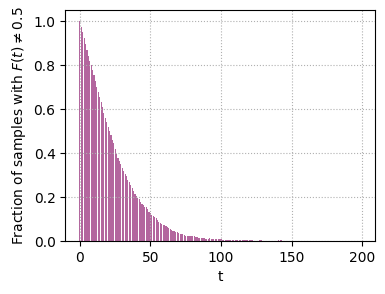

In [12]:
not_final_value = []
for i in range(200):
    counts_at_time_i = list(counts[str(i)])
    counter = Counter(counts_at_time_i)
    not_final_value.append((2000 - counter[0.5]) / 2000)

ts = np.arange(200)
plt.figure(figsize=(4, 3))
plt.bar(ts, not_final_value, color="#b3669e")
plt.xlabel("t")
plt.ylabel(r"Fraction of samples with $F(t) \neq 0.5$")
plt.grid(linestyle="dotted")
plt.show()